In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import hdbscan
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [3]:
dataPath3='D:/Git/data/ECAContainerSpeedLessThanOneKnot/3438807_3.csv'
dt=pd.read_csv(filepath_or_buffer=dataPath3)

In [26]:
dt=dt[['mmsi','time','sog','lon','lat','status']]
dt.head()
len(dt.index)

3438807

In [27]:
sdt=dt.sample(10000,random_state=2)
sdt=sdt[(sdt.sog==0)&(sdt.status==5)]
len(sdt.index)
sdt.head()

,mmsi,time,sog,lon,lat,status
746690,564071000.0,1.395699e+09,0.0,122.161835,29.800333,5.0
1991613,636015140.0,1.413201e+09,0.0,122.078003,30.610792,5.0
210508,538003181.0,1.408770e+09,0.0,121.656883,31.336794,5.0
1527019,636012796.0,1.392547e+09,0.0,121.651970,31.339018,5.0
585043,563378000.0,1.413603e+09,0.0,121.453705,31.593737,5.0


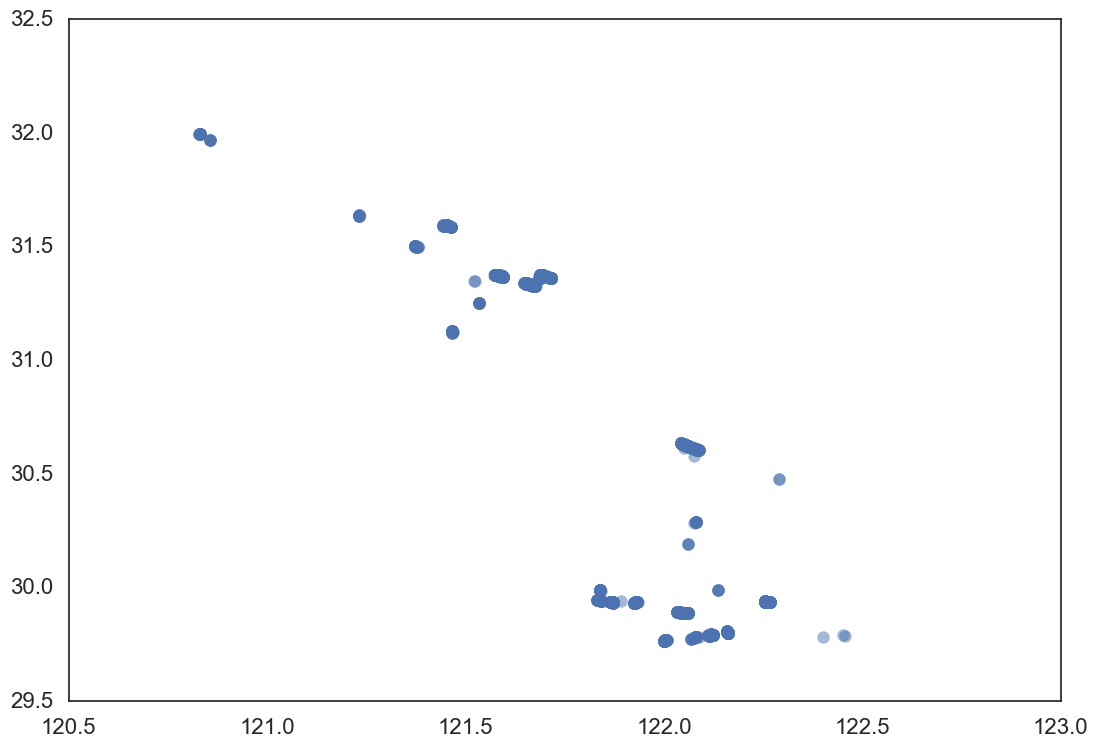

In [20]:
plt.scatter(sdt.lon,sdt.lat, linewidth=0, **plot_kwds)
plt.show()

In [21]:
mdt=sdt[['lon','lat']].as_matrix()
clusterer=hdbscan.HDBSCAN(min_cluster_size=30,gen_min_span_tree=True).fit(mdt)
clusterer.labels_.max()

28

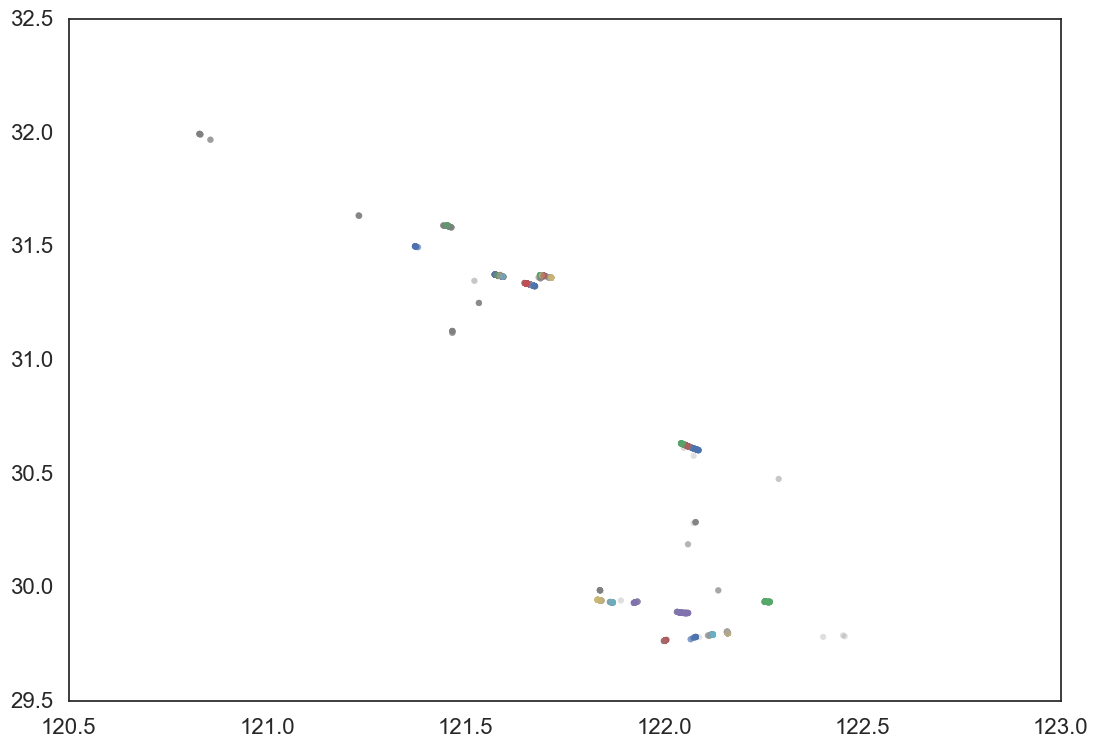

In [22]:
color_palette = sns.color_palette('deep', 300)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]

cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(sdt.lon,sdt.lat, s=20, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [23]:
clusterer.probabilities_
np.vstack([clusterer.labels_,clusterer.probabilities_]).transpose()
ddt1=sdt.as_matrix()
t1=np.vstack([ddt1.transpose(),clusterer.labels_,clusterer.probabilities_]).transpose()
np.savetxt("C:/Users/wzh/Desktop/clusters.csv", t1, delimiter=",")

In [24]:
clusterer.minimum_spanning_tree_.plot()

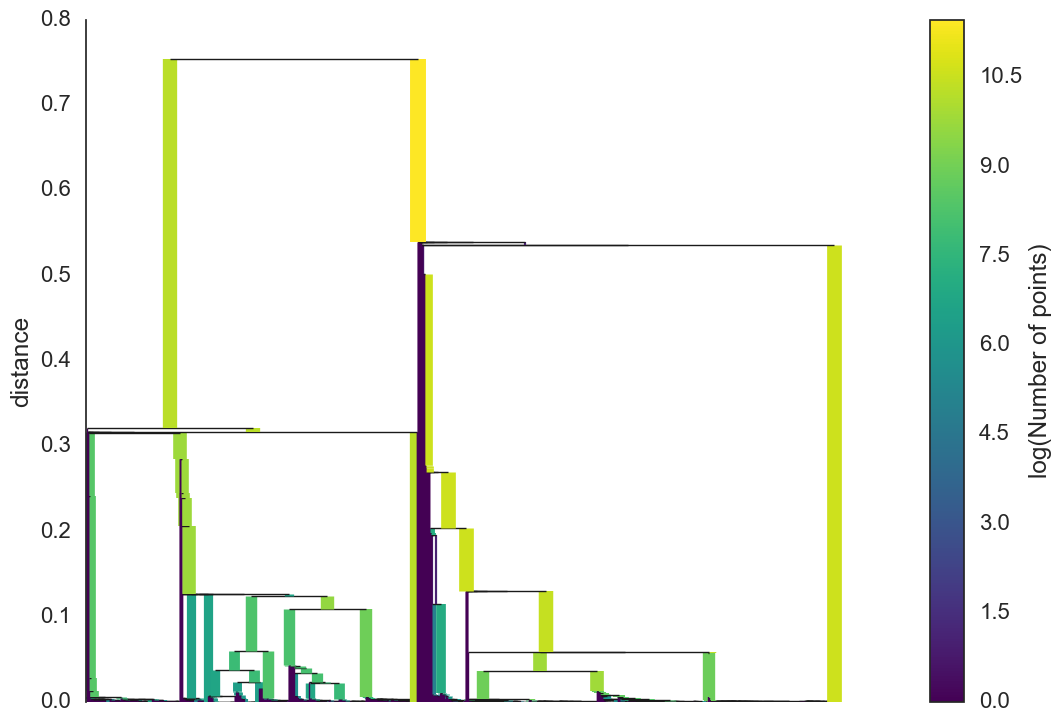

In [25]:
clusterer.single_linkage_tree_.plot()

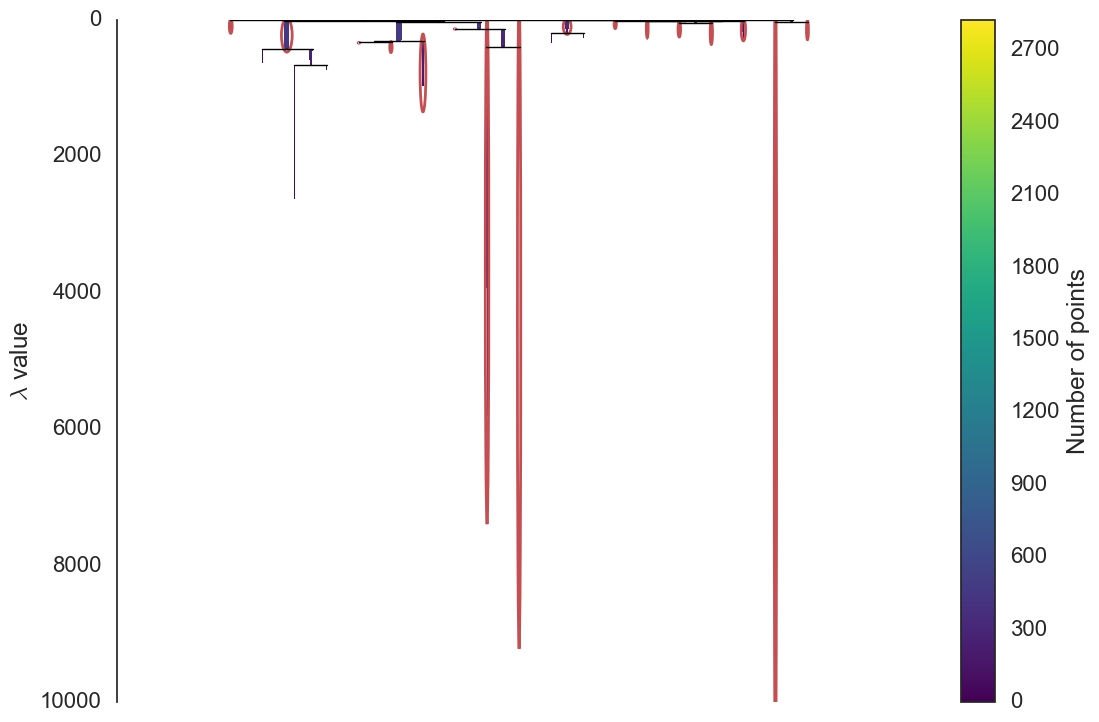

In [79]:
clusterer.condensed_tree_.plot(select_clusters=True)